# Hands-On Support Vector Machines Solutions
***

In this notebook we'll explore the details of the Soft-Margin SVM and look at how the choice of tuning parameters  affects the learned models.  We'll also look at kernel SVMs for non-linearly separable and methods for choosing and visualizing good hyperparameters.   

### Part 1: Soft-Margin SVM Details
***

Suppose you have the following labeled data set (assume here that red corresponds to $y=1$ and blue corresponds to $y = -1$) and suppose the SVM decision boundary is defined by the weights ${\bf w} = [-1/4, ~ 1/4]^T$ and $b = -1/4$. 


In [ ]:
import numpy as np
# Data and Labels 
X = np.array([[1,8],[7,2],[6,-1],[-5,0], [-5,1], [-5,2],[6,3],[6,1],[5,2]])
y = np.array([1,-1,-1,1,-1,1,1,-1,-1])

# Support vector parameters 
w, b = np.array([-1/4, 1/4]), -1/4
# w, b = np.array([-1/2, 1/2]), -1/2

**Q1.1** Complete `linear_plot` to produce the figure below
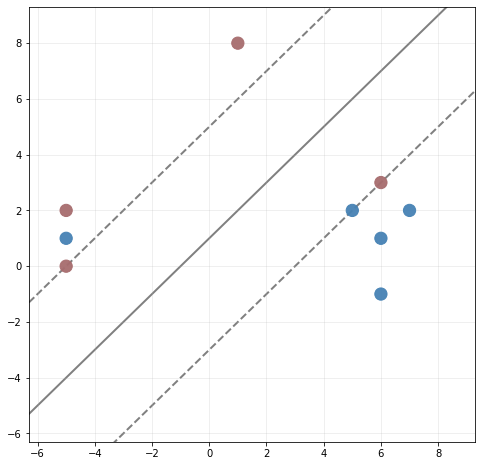

In [ ]:
import matplotlib.pyplot as plt


def linear_plot(X, y, w=None, b=None):
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    colors = [mycolors["red"] if yi == 1 else mycolors["blue"] for yi in y]

    # Plot data
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    ax.scatter(X[:, 0], X[:, 1], color=colors, s=150, alpha=0.95, zorder=2)

    # Plot boundaries
    lower_left = np.min([np.min(X[:, 0]), np.min(X[:, 1])])
    upper_right = np.max([np.max(X[:, 0]), np.max(X[:, 1])])
    gap = .1 * (upper_right - lower_left)
    xplot = np.linspace(lower_left - gap, upper_right + gap, 20)
    if w is not None and b is not None:
        ax.plot(xplot, ?, color="gray", lw=2, zorder=1)
        ax.plot(xplot, ?, color="gray", lw=2, ls="--", zorder=1)
        ax.plot(xplot, ?, color="gray", lw=2, ls="--", zorder=1)

    ax.set_xlim([lower_left - gap, upper_right + gap])
    ax.set_ylim([lower_left - gap, upper_right + gap])

    ax.grid(alpha=0.25)
    return ax


In [ ]:
# Plot the data and support vector boundaries
linear_plot(X, y, w=w, b=b)

**Q1.2**: What is the margin of this particular SVM?

**Solution**: (expession)

In [ ]:
# Compute the margin

**Q1.3**: Which training examples are the support vectors? 

**Solution**: 

**Q1.4**: Which training examples have nonzero slack? 

**Solution**: 

**Q1.5**: Compute the slack $\xi_i$ associated with the misclassified points. Do these values jive with the plot of the data and the support vector boundaries? 

**Solution**: (Expression)

In [ ]:
# Compute the slack

**Q1.6**: Suppose we obtained the parameters ${\bf w}$ and $b$ by solving the Dual optimization problem.  Which of the following are possible realizations of the Lagrange multipliers? Here $C$ is the hyperparameter associated with the slack penalty term in the primal objective function. 

$
\texttt{i}) ~~~~\quad \alpha^T = \left[ \begin{array}{r} 1.0 & 1.5 & 0.5 & 0.75 & 0.25 & 2.0 & 1.5 & 0.25 & 0.5 \end{array} \right] 
$

$
\texttt{ii})~~ \quad \alpha^T = \left[ \begin{array}{r} C/2 & C & 0 & 0 & C & 0 & 0 & C/2& 0 \end{array} \right]
$

$
\texttt{iii}) \quad \alpha^T = \left[ \begin{array}{r} C/3 & C & 0 & 0 & C & 0 & 0 & C/2 & 0 \end{array} \right]
$

**Solution**: 

### Part 2: The Margin vs Slack 
***

In this problem we'll figure out how to fit linear SVM models to data using sklearn.  Consider the data shown below. 


In [ ]:
def part2data():
    np.random.seed(1239)

    X = np.zeros((22, 2))
    X[0:10, 0] = 1.5 * np.random.rand(10)
    X[0:10, 1] = 1.5 * np.random.rand(10)
    X[10:20, 0] = 1.5 * np.random.rand(10) + 1.75
    X[10:20, 1] = 1.5 * np.random.rand(10) + 1
    X[20, 0] = 1.5
    X[20, 1] = 2.25
    X[21, 0] = 1.6
    X[21, 1] = 0.25

    y = np.ones(22)
    y[10:20] = -1
    y[20] = 1
    y[21] = -1

    return X, y

X, y = part2data()
linear_plot(X, y)

**Q2.1**: Let's fit a linear Soft-Margin SVM to the data above. For SVMs with a linear kernel we'll use the [`LinearSVM`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) method from sklearn's `svm` module.  Go now and look at the documentation. 

Recall that the primal objective function for the linear kernel SVM is as follows 


$$
\min_{{\bf w}, b, {\bf \xi}} \frac{1}{2}\|{\bf w}\|^2 + C \sum_{i=1}^m \xi_i
$$

The two optional parameter in `SVC` that we'll be most concerned with is `C` and `kernel`, the hyperparameter weighting the slackness contribution to the primal objective function.

Write some code below to train a linear SVM with $C=1$, get the computed weight vector and bias, and the plot the resulting model. 

In [ ]:
from sklearn.svm import SVC

# TODO: Train the model and get the parameters, pay attention to the loss parameter
# define w,b


linear_plot(X, y, w=w, b=b)

**Q2.2** What are the support vectors, their dual coefficients?

In [ ]:
# use svm attributes


**Q2.3** We have the expression of the intercept:
    \begin{align}
b = \frac{1}{|S|}\sum_{m\in S}\big[ y^{(m)} - \sum_{i\in S} \alpha_i  y^{(i)}K(x^{(i)}, x^{(m)})\big],
\end{align}

For linear kernel, $K(a,b) = \langle a, b \rangle$

Compute $b$ and compare it with the intercept from `svm`

In [ ]:
# Q9

**Q2.4**: Experiment with different values of `C`.  How does the choice of `C` affect the nature of the decision boundary and the associated margin? 

In [ ]:
from sklearn.svm import SVC

# TODO: Train the model and get the parameters, pay attention to the loss parameter

linear_plot(X, y, w=w, b=b)

In [ ]:
from sklearn.svm import SVC

# TODO: Train the model and get the parameters, pay attention to the loss parameter

linear_plot(X, y, w=w, b=b)

**Q2.5**: In general, how does the choice of `C` affect the bias and variance of the model? 

 #Answer here

### Part 3: Nonlinear SVM, Parameter Tuning, Accuracy, and Cross-Validation 
***

Any support vector machine classifier will have at least one parameter that needs to be tuned based on the training data.  The guaranteed parameter is the $C$ associated with the slack variables in the primal objective function, i.e. 

$$
\min_{{\bf w}, b, {\bf \xi}} \frac{1}{2}\|{\bf w}\|^2 + C \sum_{i=1}^m \xi_i
$$

If you use a kernel fancier than the linear kernel then you will likely have other parameters as well. For instance in the polynomial kernel $K({\bf x}, {\bf z}) = ({\bf x}^T{\bf z} + c)^d$ you have to select the shift $c$ and the polynomial degree $d$.  Similarly the rbf kernel

$$
K({\bf x}, {\bf z}) = \exp\left[-\gamma\|{\bf x} - {\bf z}\|^2\right]
$$

has one tuning parameter, namely $\gamma$, which controls how fast the similarity measure drops off with distance between ${\bf x}$ and ${\bf z}$. 

For our examples we'll consider the rbf kernel, which gives us two parameters to tune, namely $C$ and $\gamma$. 

Consider the following two dimensional data

In [ ]:
import numpy as np

def part3data(N=100, seed=1235):
    np.random.seed(seed)

    X = np.random.uniform(-1, 1, (N, 2))
    y = np.array([1 if y - x > 0 else -1 for (x, y) in zip(X[:, 0] ** 2 * np.sin(2 * np.pi * X[:, 0]), X[:, 1])])
    X = X + np.random.normal(0, .1, (N, 2))

    return X, y

In [ ]:
import matplotlib.pyplot as plt

def nonlinear_plot(X, y, clf=None):
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

    colors = [mycolors["red"] if yi == 1 else mycolors["blue"] for yi in y]
    ax.scatter(X[:, 0], X[:, 1], marker='o', color=colors, s=100, alpha=0.5)

    ax.arrow(-1.25, 0, 2.5, 0, head_length=0.05, head_width=0.05, fc="gray", ec="gray", lw=2, alpha=0.25)
    ax.arrow(0, -1.25, 0, 2.5, head_length=0.05, head_width=0.05, fc="gray", ec="gray", lw=2, alpha=0.25)
    z = np.linspace(0.25, 3.5, 10)

    ax.set_xlim([-1.50, 1.50])
    ax.set_ylim([-1.50, 1.50])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([], fontsize=16)
    plt.yticks([], fontsize=16)

    if clf:
        clf.fit(X, y)

        x_min = X[:, 0].min() + .00
        x_max = X[:, 0].max() - .00
        y_min = X[:, 1].min() + .00
        y_max = X[:, 1].max() - .00

        colors = [mycolors["red"] if yi == 1 else mycolors["blue"] for yi in y]

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.contour(XX, YY, Z, colors=[mycolors["blue"], "gray", mycolors["red"]], linestyles=['--', '-', '--'],
                    levels=[-1.0, 0, 1.0], linewidths=[2, 2, 2], alpha=0.9)

In [ ]:
X, y = part3data(N=300, seed=1235)
nonlinear_plot(X, y)

**Part 3.1**: We can use the method [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from sklearn's `svm` module to fit an SVM with a nonlinear kernel to the data.  Go now and look at the documentation. Note that we pass the `kernel="rbr"` parameter to use the RBF kernel.  The other two parameters we'll be concerned with are `C` and the RBF parameter `gamma`.   

Write some code to fit an SVM with RBF kernel to the data and plot the results.  Use the parameter values `C=1` and `gamma=1`.

In [ ]:
from sklearn.svm import SVC


# nonlinear_plot(X, y, ?)

**Q3.2**: In this part we'll use cross-validation to estimate the validation accuracy achieved by our model.  Experiment with the values of the hyperparameters to see if you can get a good validation accuracy. How do the choice of `C` and `gamma` affect the resulting decision boundary? 


In [ ]:
from sklearn.model_selection import cross_val_score

# helpers.nonlinear_plot(X, y, ?)

**Q3.3**: How does the choice of **kernel** function affect the bias/variance of the model?  


### Part 4: Automating the Parameter Search 
***

On the previous problem we were able to choose some OK parameters just by hand-tuning.  But in real life (where time is money) it would be better to do something a little more automated.  One common thing to do is a [grid-search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) over a predefined range of the parameters.  In this case you will loop over all possible combinations of parameters, estimate the accuracy of your model using K-Folds cross-validation, and then choose the parameter combination that produces the highest validation accuracy. 

**Q4.1**: Below is an experiment where we search over a logarithmic range between $2^{-5}$ and $2^{5}$ for $C$ and a range between $2^{-5}$ and $2^{5}$ for $\gamma$.  For the accuracy measure we use K-Folds CV with $K=3$.

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

c_range = np.logspace(-5, 5, 11, base=2)
g_range = np.logspace(-5, 5, 11, base=2)
param_grid = dict(gamma=g_range, C=c_range)
grid = GridSearchCV(SVC(kernel="rbf"), param_grid=param_grid, cv=3)
grid.fit(X, y)

**Q4.2**: The following function will plot a heat-map of the cross-validation accuracies for each combination of parameters.  Which combination looks the best?

In [ ]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotSearchGrid(grid):
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()


In [ ]:
plotSearchGrid(grid)

**Q4.3**: The GridSearchCV object scores, among other things, the best combination of parameters as well as the cross-validation accuracy achieved with those parameters.  Print those quantities for our model. 

In [ ]:
# print("best parameters: ",?)
# print("best accuracy: ", ?)

**Q4.4**: The GridSearchCV object also stores the classifier trained with the best hyperparameters.  Pass this best estimator into the `nonlinear_plot` function to view the best decision boundary. 

In [ ]:
# helpers.nonlinear_plot(X, y,?)